# 14. час: Сортирање, филтрирање и фреквенцијска анализа

На овом часу ћемо говорити о:
1. преуређивању редова табеле како би се поређали по величини по неком критеријуму (_сортирање_);
2. издвајању редова табеле који задовољавају неке услове (_филтрирање_); и
3. бројању редова табеле који имају неке особине (_фреквенцијска анализа_).

## 14.1. Сортирање података

_Сортирати податке_ значи поређати их по величини. Да бисмо видели како се то ради у библиотеци _pandas_ прво ћемо учитати библиотеку:

In [1]:
import pandas as pd

а онда ћемо направити табелу са подацима о групи деце коју смо већ користили, колонама ћемо дати одговарајућа имена и индексираћемо табелу именима деце:

In [2]:
podaci = [["Ана",     "ж", 13, 46, 160],
          ["Бојан",   "м", 14, 52, 165],
          ["Влада",   "м", 13, 47, 157],
          ["Гордана", "ж", 15, 54, 165],
          ["Дејан",   "м", 15, 56, 163],
          ["Ђорђе",   "м", 13, 45, 159],
          ["Елена",   "ж", 14, 49, 161],
          ["Жаклина", "ж", 15, 52, 164],
          ["Зоран",   "м", 15, 57, 167],
          ["Ивана",   "ж", 13, 45, 158],
          ["Јасна",   "ж", 14, 51, 162]]
tabela = pd.DataFrame(podaci)
tabela.columns=["Име", "Пол", "Старост", "Тежина", "Висина"]
tabela1 = tabela.set_index("Име")

Ево како табела изгледа:

In [3]:
tabela1

,Пол,Старост,Тежина,Висина
Име,,,,
Ана,ж,13,46,160
Бојан,м,14,52,165
Влада,м,13,47,157
Гордана,ж,15,54,165
Дејан,м,15,56,163
Ђорђе,м,13,45,159
Елена,ж,14,49,161
Жаклина,ж,15,52,164
Зоран,м,15,57,167


Хајде сада да сортирамо табелу по висини употребом функције `sort_values` (енгл. _sort_ значи "сортирај, поређај по величини", док _values_ значи "вредности").

Овој функцији морамо да кажемо по ком критеријуму се сортирају подаци (по висини, тежини, старости, ...) тако што име одговарајуће колоне наведемо као вредност аргумента `by` (енгл. реч "by" значи свашта, али у овом контексту значи "према").

Функција не мења полазну табелу, већ од ње прави нову:

In [4]:
tabela1_po_visini = tabela1.sort_values(by="Висина")
tabela1_po_visini

,Пол,Старост,Тежина,Висина
Име,,,,
Влада,м,13,47,157
Ивана,ж,13,45,158
Ђорђе,м,13,45,159
Ана,ж,13,46,160
Елена,ж,14,49,161
Јасна,ж,14,51,162
Дејан,м,15,56,163
Жаклина,ж,15,52,164
Бојан,м,14,52,165


Пошто нисмо навели како желимо да сортирамо податке (од најмањег ка највећем, или обрнуто) подаци су сортирани од најмањег ка највећем. Уколико желимо да сортирамо табелу по висини, али од највеће ка најмањој, потребно је то нагласити користећи параметар `ascending=False` (енгл. _ascending_ значи "растуће").

In [5]:
tabela1_po_visini = tabela1.sort_values(by="Висина", ascending=False)
tabela1_po_visini

,Пол,Старост,Тежина,Висина
Име,,,,
Зоран,м,15,57,167
Бојан,м,14,52,165
Гордана,ж,15,54,165
Жаклина,ж,15,52,164
Дејан,м,15,56,163
Јасна,ж,14,51,162
Елена,ж,14,49,161
Ана,ж,13,46,160
Ђорђе,м,13,45,159


Хајде, за крај, да прикажемо податке из овако сортиране табеле.

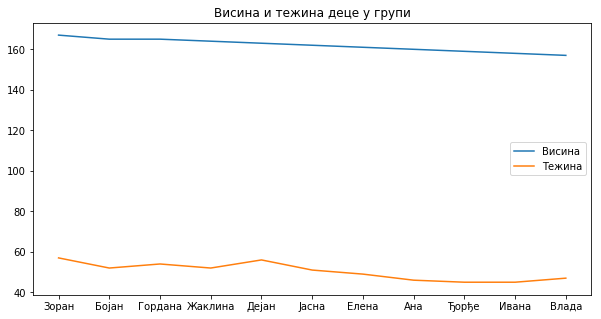

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(tabela1_po_visini.index, tabela1_po_visini["Висина"], label="Висина")
plt.plot(tabela1_po_visini.index, tabela1_po_visini["Тежина"], label="Тежина")
plt.title("Висина и тежина деце у групи")
plt.legend()
plt.show()
plt.close()

## 14.2. Филтрирање података

Често је из табеле потребно издвојити редове који имају неке особине. На пример, ако желимо да издвојимо само оне редове табеле у којима су наведени подаци о девојчицама, то можемо урадити на следећи начин:

    tabela1[tabela1.Пол == "ж"]

Овај израз ће из табеле `tabela1` издвојити све редове код којих у колони "Пол" пише "ж". (Обратите пажњу на то да се приликом формирања критеријума у изразу `tabela1.Пол` не пишу наводници! Не питајте зашто...)

In [8]:
devojke = tabela1[tabela1.Пол == "ж"]
devojke

,Пол,Старост,Тежина,Висина
Име,,,,
Ана,ж,13,46,160
Гордана,ж,15,54,165
Елена,ж,14,49,161
Жаклина,ж,15,52,164
Ивана,ж,13,45,158
Јасна,ж,14,51,162


На сличан начин можемо да издвојимо сву децу која имају преко 50 кг:

In [9]:
preko_50kg = tabela1[tabela1.Тежина > 50]
preko_50kg

,Пол,Старост,Тежина,Висина
Име,,,,
Бојан,м,14,52,165
Гордана,ж,15,54,165
Дејан,м,15,56,163
Жаклина,ж,15,52,164
Зоран,м,15,57,167
Јасна,ж,14,51,162


Критеријуме можемо и да комбинујемо. На пример, ако желимо да из табеле извучемо податке о свим дечацима са највише 55 кг, то можемо учинити овако:

In [10]:
decaci_do_55kg = tabela1[(tabela1.Тежина <= 55) & (tabela1.Пол == "м")]
decaci_do_55kg

,Пол,Старост,Тежина,Висина
Име,,,,
Бојан,м,14,52,165
Влада,м,13,47,157
Ђорђе,м,13,45,159


Приказаћемо, за крај, податке о тежини и висини ових дечака једним графиконом:

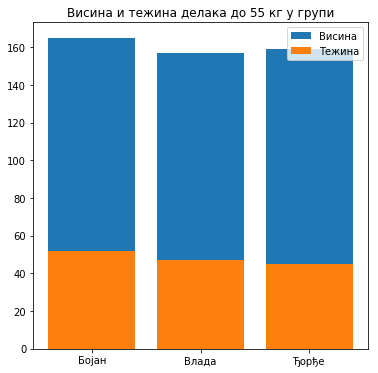

In [11]:
plt.figure(figsize=(6,6))
plt.bar(decaci_do_55kg.index, decaci_do_55kg["Висина"], label="Висина")
plt.bar(decaci_do_55kg.index, decaci_do_55kg["Тежина"], label="Тежина")
plt.title("Висина и тежина делака до 55 кг у групи")
plt.legend()
plt.show()
plt.close()

## 14.3. Фреквенцијска анализа


Да се подсетимо, фреквенцијска анализа низа података се своди на то да се преброје подаци исте врсте у низу. Док смо раније морали доста тога сами да урадимо, библиотека `pandas` има функцију `value_counts` која врши фреквенцијску анализу (енгл. _value_ значи "вредност", док _count_ значи "бројати"; дакле, пребројати вредности).

Ево примера. Ако у табели са којом радимо желимо да пребројимо дечаке и девојчице, то можемо учинити позивом функције `value_counts` овако:

In [12]:
tabela1["Пол"].value_counts()

ж    6
м    5
Name: Пол, dtype: int64

Функција `value_counts` је у колони "Пол" пребројала све вредности и утврдила да се у тој колони вредност "ж" појављује 6 пута, док се вредност "м" појављује 5 пута.

Ако желимо да утврдимо старосну структуру групе, применићемо функцију `value_counts` на колону "Старост":

In [13]:
tabela1["Старост"].value_counts()

15    4
13    4
14    3
Name: Старост, dtype: int64

Функција `value_counts` је у колони "Старост" пребројала све вредности и утврдила да се у тој колони вредности 15 и 13 појављују по 4 пута, док се вредност 14 појављује 3 пута.

Ако резултат рада функције `value_counts` сместимо у променљиву:

In [14]:
frekv = tabela1["Пол"].value_counts()
frekv

ж    6
м    5
Name: Пол, dtype: int64

онда можемо лако да реконструишемо које су вредности уочене у табели, и које су њихове фреквенције:

    frekv.index
    
нам даје листу уочених вредности, док
    
    frekv.values

даје њихове фреквенције.

In [15]:
print("Вредности које се јављају у колони:", frekv.index)
print("Њихове фреквенције:", frekv.values)

Вредности које се јављају у колони: Index(['ж', 'м'], dtype='object')
Њихове фреквенције: [6 5]


Полну структуру ове групе деце можемо да прикажемо секторским дијаграмом овако:

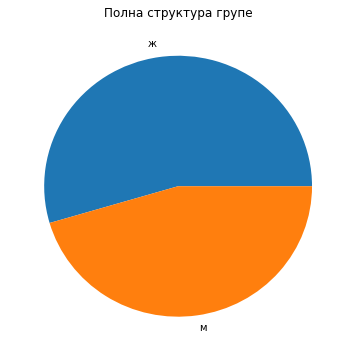

In [16]:
import matplotlib.pyplot as plt
frekv = tabela1["Пол"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(frekv.values, labels=frekv.index)
plt.title("Полна структура групе")
plt.show()
plt.close()

На сличан начин можемо да прикажемо старосну структуру групе:

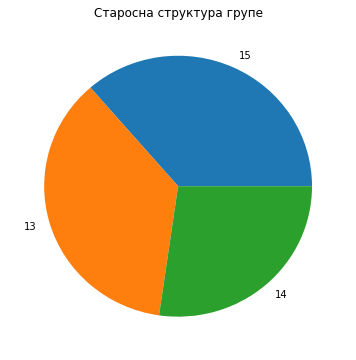

In [17]:
frekv = tabela1["Старост"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(frekv.values, labels=frekv.index)
plt.title("Старосна структура групе")
plt.show()
plt.close()

На адреси

    https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv
    
се налази јавно доступан списак свих држава на свету. Ову табелу можемо лако учитати наредбом `read_csv`:

In [18]:
drzave = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
drzave.head(5)

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Број држава по континентима можемо видети овако:

In [19]:
drzave["Region"].value_counts()

AFRICA           54
EUROPE           47
ASIA             44
NORTH AMERICA    23
OCEANIA          14
SOUTH AMERICA    12
Name: Region, dtype: int64

Прикажимо број држава по континентима секторским дијаграмом:

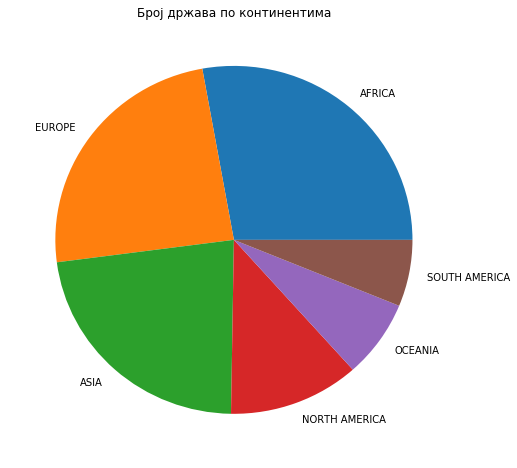

In [20]:
import matplotlib.pyplot as plt
po_kontinentima = drzave["Region"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(po_kontinentima.values, labels=po_kontinentima.index)
plt.title("Број држава по континентима")
plt.show()
plt.close()

## 14.4. Задаци

**Задатак 1.** У датотеци _podaci/RekeSrbije.csv_ наведене су најдуже реке Србије, њихова укупна дужина у км, и дужина тока кроз Србију у км.

_(а)_ Учитај податке у табелу (табела има заглавље), и прикажи првих неколико редова табеле.

 
_(б)_ Сортирај табелу по дужини тока реке кроз Србију.

_(в)_ За наведене реке прикажи линијским дијаграмом укупну дужину, и дужину тока реке кроз Србију.

_(г)_ Од дате табеле направи нову у којој су издвојене само оне реке које бар половину свог тока протичу кроз Србију, па тако добијену табелу упиши у датотеку _podaci/Reke2.csv_ водећи рачуна о томе да су нек подаци у табели записани ћирилицом.

**Задатак 2.** Нутритивни подаци за неке рибе и морске плодове су дати у следећој табели:

| Намирница (100г) | Енергетска вредност (kcal) | Угљени хидрати (г) | Беланчевине (г) | Масти (г) |
|--|--|--|--|--|
|Туна|116|0|26|1|
|Ослић|88|0|17.2|0.8|
|Пастрмка|119|0|18|5|
|Лосос|116|0|20|3.5|
|Скуша|205|0|19|14|
|Сардине|135|0|18|5|
|Харинга|158|0|18|9|
|Бакалар|82|0|18|0.7|
|Сом|95|0|16.4|2.8|
|Шаран|127|0|17.6|5.6|
|Орада|115|0|16.5|5.5|
|Јегуља|184|0|18.4|11.7|
|Шкампи|106|1|20|2|
|Дагње|86|4|12|2|
|Козице|71|1|13|1|
|Лигње|92|3|15.6|1.3|
|Хоботница|81|0|16.4|0.9|
|Јастог|112|0|20|1.5|

Подаци из табеле су представљени листом у ћелији испод:

In [ ]:
# изврши ову ћелију
morski_plodovi = [
  ["Туна", 116, 0, 26, 1],
  ["Ослић", 88, 0, 17.2, 0.8],
  ["Пастрмка", 119, 0, 18, 5],
  ["Лосос", 116, 0, 20, 3.5],
  ["Скуша", 205, 0, 19, 14],
  ["Сардине", 135, 0, 18, 5],
  ["Харинга", 158, 0, 18, 9],
  ["Бакалар", 82, 0, 18, 0.7],
  ["Сом", 95, 0, 16.4, 2.8],
  ["Шаран", 127, 0, 17.6, 5.6],
  ["Орада", 115, 0, 16.5, 5.5],
  ["Јегуља", 184, 0, 18.4, 11.7],
  ["Шкампи", 106, 1, 20, 2],
  ["Дагње", 86, 4, 12, 2],
  ["Козице", 71, 1, 13, 1],
  ["Лигње", 92, 3, 15.6, 1.3],
  ["Хоботница", 81, 0, 16.4, 0.9],
  ["Јастог", 112, 0, 20, 1.5]]

_(а)_ Од ове листе у ћелији испод направи _DataFrame_ и дај колонама табеле погодна имена. Предлажемо да свакој колони даш име које ће бити само једна реч (рецимо "Намирница", "ЕнергВр", "УХ", "Бел", "Масти") како би у каснијим задацима лакше именовао колоне табеле.

_(б)_ Соритрај табелу по енергетској вредности намирнице од највеће ка најмањој вредности и прикажи хистограмом тако сортиране енергетске вредности.

_(в)_ Од овако сортиране табеле направи нову у којој су само оне намирнице које не садрже угљене хидрате и имају мање од 10 г масти на 100 г намирнице.

_(г)_ Направи фреквенцијску анализу ових података према количини угљених хидрата и прикажи резултате анализе секторским дијаграмом.

**Задатак 3.** Ученици једног разреда су скакали у даљ. Сваки ученик је скако три пута и резултати су дати у датотеци _SkokUDalj.csv_ која се налази у фолдеру _podaci_. Табела има заглавље и састоји се од четири колоне: "Презиме и име", "Скок1", "Скок2" и "Скок3".

_(а)_ Учитај датотеку у структуру података _DataFrame_.

_(б)_ Додај табели нову колону "Макс" и онда за сваког ученика израчунај и у ту колону упиши његов најбољи скок.

_(в)_ Сортирај табелу по колони "Макс" и прикажи првих пет редова тако сортиране табеле (да видимо ко су најбољи скакачи у разреду).

**Задатак 4.** На адреси

    https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv

се налази јавно доступна табела са списком држава света и неким параметрима економског развоја тих држава праћеним у интервалима од 5 година.

Табела има следеће колоне:

* country = држава
* year = година на коју се односе подаци
* pop = број становника (енгл. _population_)
* continent = континент
* lifeExp = очекивани животни век у годинама (енгл. _life expextancy_)
* gdpPercap = БДП по глави становника у америчким доларима (енгл. _GDP per capitem_)

_(а)_ Учитај ову табелу у структуру података _DataFrame_.

_(б)_ У нову табелу издвој податке који се односе на Србију (Упутство: `tabela[tabela.country == "Serbia"]`)

_(в)_ Прикажи линијским дијаграмом како се мењао очекивани животни век грађана Србије за године за које постоје подаци у табели.

_(г)_ Прикажи хистограмом како се мењао БДП по глави становника Србије за године за које постоје подаци у табели.

_(д)_ Табелу која се односи на Србију упиши у датотеку _FYDSerbia.csv_ (сви подаци у табели су записани енглеским алфабетом па нема муке око система за кодирање података), али тако да у датотеку не упишемо индексну колону.